In [ ]:
#Credit Analysis
#We will explore in this data analysis the behavior of borrowers. 
#Questions such as for what purpose do borrowers apply for credit loans?, How many jobs do each borrower have? , 
#What patterns (if any) determine whether the loan will have a good or bad risk ? 
#Of course, many more questions will be answered through our in-depth analysis of credit borrowers. 
#To make visualizations more interactive we will be using all our charts with plotly, 
#an interactive library that will allow us to have a better insight about our data.



In [ ]:
#Outline :
#1) Brief Overview

#2) Analysis by Type of Group
#a) Gender Analysis
#b) Age Groups
#c) Wealth Analysis


#3) Correlations and Purposes of Loans
#a) Correlations
#b) Loan Purpose

#4) Modeling
#a) Predictive Modelling

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import os
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Importing our data
os.chdir('E:\\Captures\\german-credit-data-with-risk')
df = pd.read_csv("creditdata.csv",index_col=0)

original_df = df.copy()

In [5]:
df = df.rename(columns={"Credit amount": "Credit_amount"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit_amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
df.describe()

#Summary:
#We have four numeric and four categorical features.
#The average age of people in our dataset is 35.54
#The average credit amount borrowed is 3271

,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Risk                  0
Purpose               0
Duration              0
Credit_amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [9]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


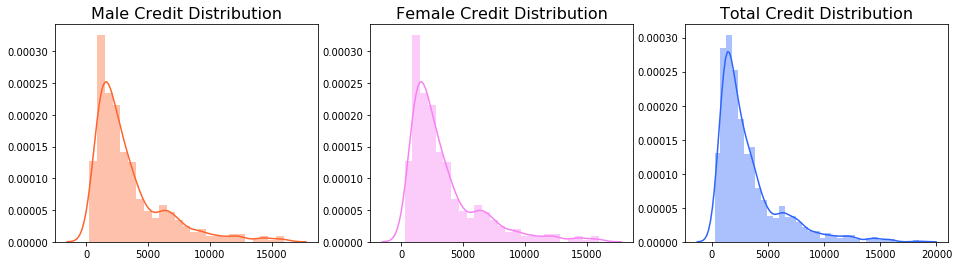

In [10]:
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

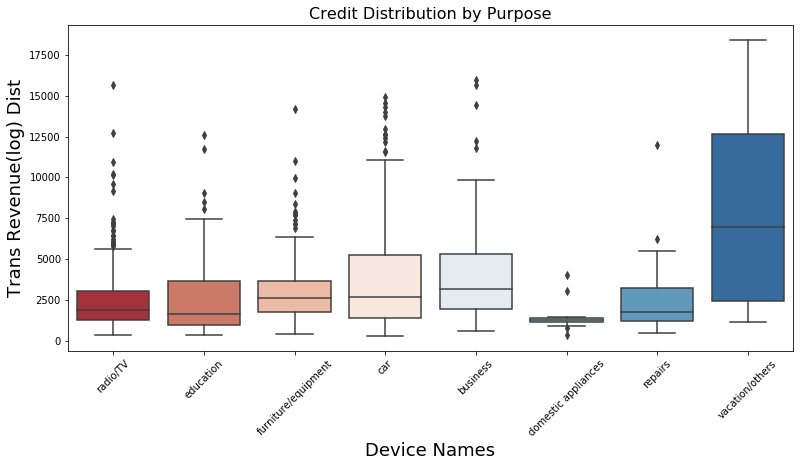

In [11]:
import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit_amount', 
                   data=df, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

In [12]:
# We have 2x more males applying for Credit Loans than Females.
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [ ]:
#Summary:
#Theres 2x more males than females in our dataset.
#Most females that applied for a credit loan were less than 30 .
#Most of the males that applied for a loan ranged from their 20s-40s
#Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)
#Males applied 2x more than females for a credit loan to invest in a business.
#2x of females were unemployed compared to males.
#2x of males worked 3 jobs compared to females.
#Suprisingly, most people that applied for a credit loan have two jobs!

In [14]:
from plotly import tools
#import plotly.plotly as py
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
    marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [15]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [16]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Round values
male_purpose = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=male_purpose,
    name='German Males',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)
female = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=female_purpose,
    name='German Females',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

data = [male, female]
layout = dict(
    title='Application Reasons for a Loan by Gender',
     xaxis=dict(
        title='(% of Gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
            ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

In [17]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


In [18]:
# create for each group risky and non-risky loans.
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [19]:
# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)'),
    line = dict(
        color = 'rgb(111, 200, 37)')
)

young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)'),
    line = dict(
        color = 'rgb(38, 214, 177)')
)

senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)'),
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)'),
    line = dict(
        color = 'rgb(115, 77, 46)')
    )

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

In [20]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [21]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(34, 178, 178)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
             "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(178, 34, 34)'
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit Borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}
iplot(fig, filename = 'Age-Housing', validate=False)

In [22]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.

# Age Group Segments
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()
# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))
x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

In [23]:
# We have some missing value so we will just ignore the missing values in this analysis.
df["Checking account"].unique()
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [24]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [26]:
#import plotly.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

In [27]:
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0 
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1
    
    
df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [28]:
import plotly.figure_factory as ff


corr = df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
iplot(fig, filename='annotated_heatmap')

In [30]:
#  Looking at correlations in the form of Scatterplots.

import plotly.figure_factory as ff

import numpy as np
import pandas as pd

numeric_vals = df.select_dtypes(exclude=['object'])


risks = df['Risk'].values.tolist()

colormap = ['#b22222', '#4169e1']

numeric_matrix = numeric_vals.as_matrix()


dataframe = pd.DataFrame(numeric_matrix,
                         columns=['Credit_amount', 'Duration', 'Job', 'Age', 'Risk'])

dataframe['Risk'] = pd.Series(risks)


fig = ff.create_scatterplotmatrix(dataframe, diag='histogram', index='Risk', colormap=colormap,
                                  height=800, width=800)
iplot(fig, filename='Histograms along Diagonal Subplots')


In [31]:
# The higher the credit amount the higher the risk of the loan. Scatter plot?
# The higher the duration of the loan the higher the risk of the loan?

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [32]:
import plotly.graph_objs as go


radio_tv = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = df['Purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


In [33]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [34]:
# This will be x
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()




good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Risk',
    text='%',
    marker=dict(
        color='rgb(123, 255, 255)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Risk',
    text = '%',
    marker=dict(
        color='rgb(255, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
        ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

In [35]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(28, 98, 98)", "size": 12}, 
          "mode": "markers", 
          "name": "Good Risk", 
          "type": "scatter"
}

bad_risk = {"x": bad_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(98, 28, 28)", "size": 12}, 
          "mode": "markers", 
          "name": "Bad Risk", 
          "type": "scatter", 
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose", 
          "xaxis": {"title": "Credit Amount Borrowed", }, 
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}
fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

In [36]:
# Check missing values in our dataframe
original_df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [37]:
# We will drop the columns that have missing values although we will be loosing some information. Hopefully this does not cause
# the model to underfit in the future.
original_df.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

In [38]:
original_df.isnull().sum().sort_values(ascending=False)

Risk             0
Purpose          0
Duration         0
Credit amount    0
Housing          0
Job              0
Sex              0
Age              0
dtype: int64

In [39]:
# Feature Engineering (We cannot delete the missing values because we have too litle information)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

original_df["Risk"].value_counts() # 70% is good risk and 30% is bad risk.

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in stratified.split(original_df, original_df["Risk"]):
    strat_train = original_df.loc[train]
    strat_test = original_df.loc[test]
    

# The main purpose of this code is to have an approximate ratio
# of 70% good risk and 30% bad risk in both training and testing sets.
strat_train["Risk"].value_counts() / len(df) 
strat_test["Risk"].value_counts() / len(df)

good    0.14
bad     0.06
Name: Risk, dtype: float64

In [40]:
# Have our new train and test data
train = strat_train
test = strat_test


# Our features
X_train = train.drop('Risk', axis=1)
X_test = test.drop('Risk', axis=1)

# Our Labels we will use them later
y_train = train["Risk"]
y_test = test["Risk"]

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
      def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)
        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
    

IndentationError: unindent does not match any outer indentation level (<ipython-input-41-2ef474a22890>, line 14)

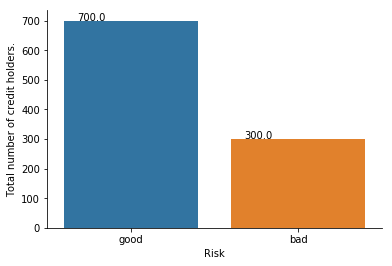

In [43]:
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')
ax = sns.countplot('Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.08,1)
plt.show()


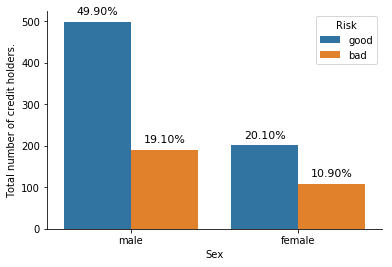

In [44]:
ax = sns.countplot('Sex',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.08,1)
plt.show()

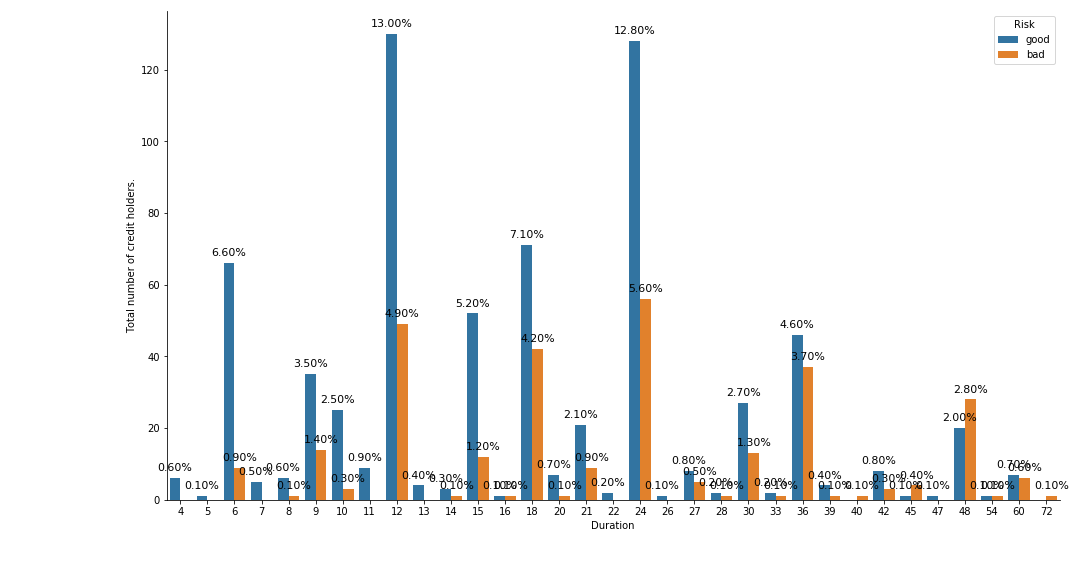

In [51]:
plt.figure(figsize=(16,9))
ax = sns.countplot('Duration',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.08,1)
plt.show()

In [52]:
gender_df = df.groupby(['Sex','Risk'])['Purpose'].value_counts()
gender_df

Sex     Risk  Purpose            
female  bad   car                     40
              furniture/equipment     28
              radio/TV                19
              education                9
              business                 7
              domestic appliances      2
              repairs                  2
              vacation/others          2
        good  radio/TV                66
              car                     54
              furniture/equipment     46
              education               15
              business                12
              domestic appliances      4
              repairs                  3
              vacation/others          1
male    bad   car                     66
              radio/TV                43
              furniture/equipment     30
              business                27
              education               14
              repairs                  6
              vacation/others          3
              domestic 

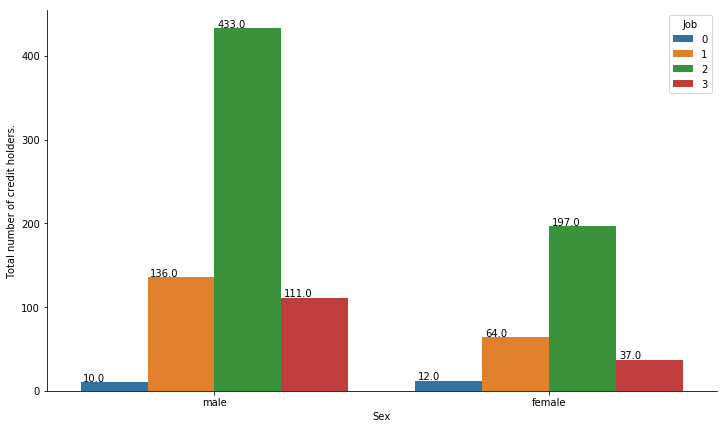

In [53]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Sex',hue='Job', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

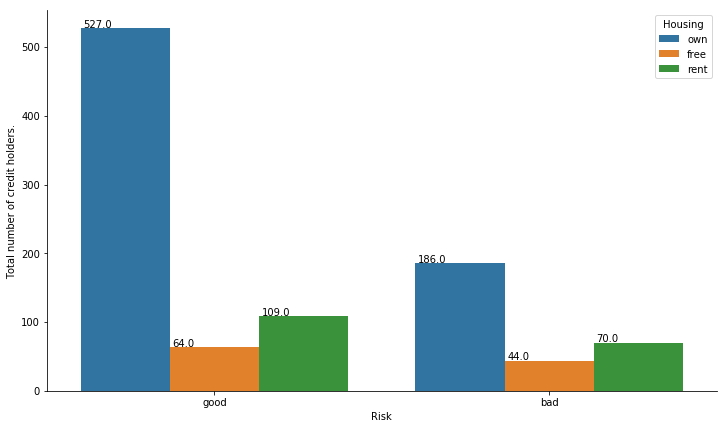

In [54]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Risk',hue='Housing', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

In [55]:
gender_df = df.groupby(['Purpose','Risk'])['Sex'].value_counts()
gender_df

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

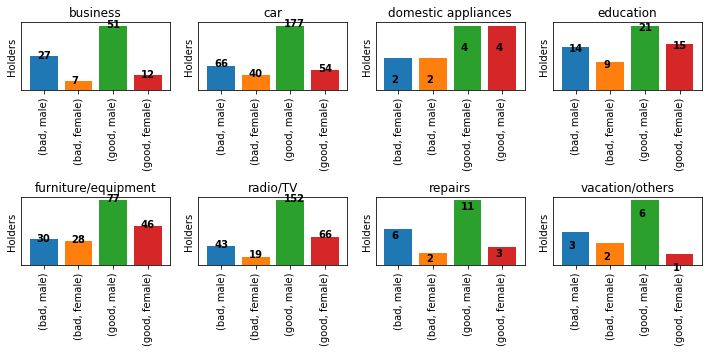

In [56]:
purpose_group = gender_df.groupby('Purpose')
fig = plt.figure()
count =  1

for gender, group in purpose_group:
    ax = fig.add_subplot(2,4,count)
    ax.set_title(gender)
    ax = group[gender].plot.bar(figsize = (10,5), width = 0.8)
    
    count+=1
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Holders')
    
    total_of_holders = []
    for i in ax.patches:
        total_of_holders.append(i.get_height())
        total = sum(total_of_holders)
    for i in ax.patches:
         ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

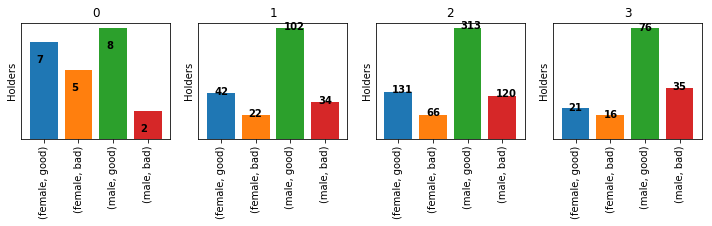

In [57]:
job_df = df.groupby(['Job','Sex'])['Risk'].value_counts()
job_group = job_df.groupby('Job')

fig = plt.figure()
count =  1

for gender, group in job_group:
    ax = fig.add_subplot(2,4,count)
    ax.set_title(gender)
    ax = group[gender].plot.bar(figsize = (10,5), width = 0.8)
    
    count+=1
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Holders')
    
    total_of_holders = []
    for i in ax.patches:
        total_of_holders.append(i.get_height())
        total = sum(total_of_holders)
    for i in ax.patches:
         ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

In [59]:
df.rename(columns=lambda x:x.replace('Unnamed: 0','id'), inplace = True )

In [60]:
df['Checking account'].fillna('no-info', inplace = True)
df['Saving accounts'].fillna('no-info', inplace = True)

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])

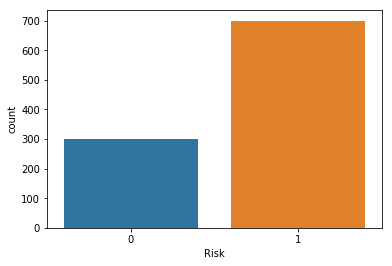

In [62]:
sns.countplot('Risk', data = df)
plt.show()

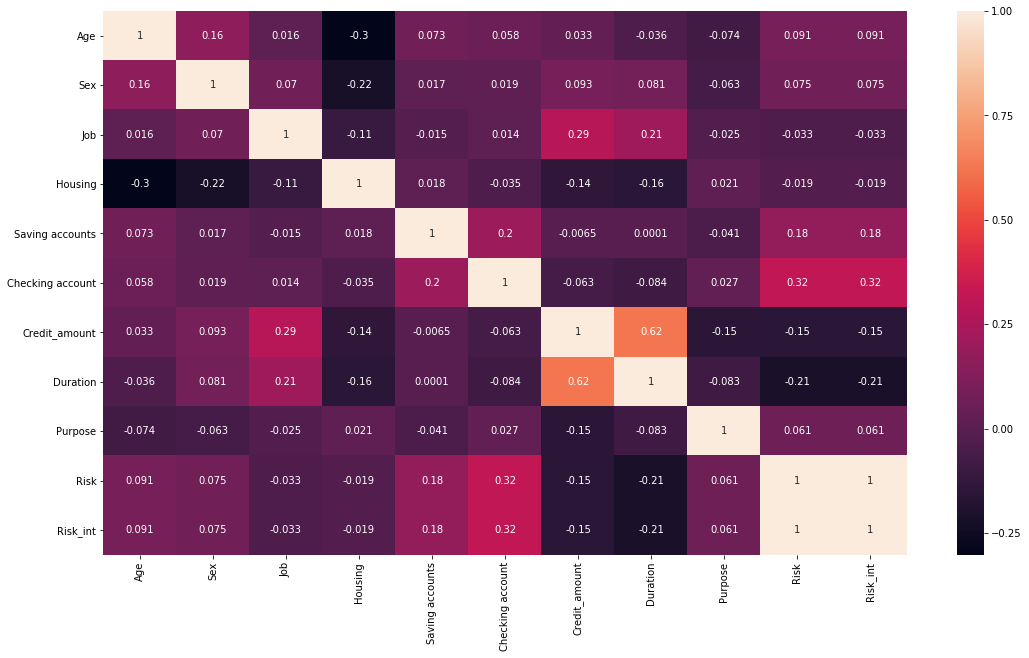

In [63]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()